In [1]:
#All of the librarys we need to use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import r2_score
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
# This is part of your data endpoint 

#First I will be importing the data set we made from google sheets
dir_loc = os.getcwd()
filename = '/data/data.csv'
#file = '/Users/michael/Downloads/e_data.csv'
file = str(dir_loc+filename)
#col_names = ["Year", "FossilFuels", "Nuclear", "Hydro-electric", "Biomass", "Solar", "Wind", "Geothermal"]
energy_data = pd.read_csv(file)

file1 = open(dir_loc+filename, 'r') 
lines = file1.readlines() 

year = []
for i in energy_data["Year"]:
    j = i[:-3]
    k = int(j.replace("-", ''))
    year.append(k)
    
arr = []
j = 0
for i in year:
    arr.append(j)
    j = j + 1
print(energy_data)
print(arr)

           Year  All fuels (utility-scale)    coal  petroleum liquids  \
0    2001-01-01                     332493  177287              17300   
1    2001-02-01                     282940  149735               9626   
2    2001-03-01                     300707  155269              10981   
3    2001-04-01                     278079  140671              10237   
4    2001-05-01                     300492  151593               9641   
5    2001-06-01                     327694  162616              10997   
6    2001-07-01                     357614  179060              10050   
7    2001-08-01                     370533  183116              13235   
8    2001-09-01                     306929  154158               6432   
9    2001-10-01                     294734  148931               5573   
10   2001-11-01                     278934  144117               5090   
11   2001-12-01                     305496  157402               5484   
12   2002-01-01                     319941  164358 

In [3]:
#Making histogram for all of the data we have to organize and visualize data
def energy_histogram(data):
    row_num = 0
    a = []

    for row in data:
        a.append(row)
        row_num += 1
    
    for i in range(len(a)):
        data.hist(a[i])
        plt.xlabel("Consumption (Trillion BTU)")
        plt.ylabel("Frequency")
        plt.show()
    
    print(row_num)
    
energy_histogram(energy_data)

print("Mean For Data:")
print(energy_data.mean())
print("Median For Data:")
print(energy_data.median())

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

In [2]:
def Training_Data(col):
    scaler_data = StandardScaler()
    scale_data = scaler_data.fit_transform(energy_data[col].values.reshape(-1,1))
    x = np.array(arr).reshape(-1,1)
    y = energy_data[col].values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x, scaler_data, test_size = .2, random_state = 1)
    return(x_train, x_test, y_train, y_test,x,y)

In [4]:
def SVR_Prediction(data_sel):
    x_train, x_test, y_train, y_test,x,y = Training_Data(data_sel)
    model = SVR(kernel='rbf', C=10000, gamma=0.1)
    model.fit(x_train, y_train)
    prediction=model.predict(x_test)
    plt.scatter(x_train, y_train, color='blue')
    data_range = np.linspace(min(x_test), max(x_test)).reshape(-1,1)
    prediction = model.predict(data_range)
    plt.plot(data_range, prediction , color="black", linewidth = 1)
    plt.ylabel(data_sel+" Energy (Trillion BTU)")
    plt.xlabel("Year")
    plt.show()
    print(model.score(x,y))
    return(model)

In [5]:
ff = "FossilFuels"
nuc = "Nuclear"
he = "Hydro-electric"
bio = "Biomass"
geo = "Geothermal"
wind = "Wind"
sol = 'Solar'

In [6]:
def model_year_predict(model, year):
    svr_model_pred = SVR_Prediction(model)
    return(svr_model_pred.predict(year))
model_year_predict(ff,[[290]])


NameError: name 'energy_data' is not defined

229 229


/Users/michael/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


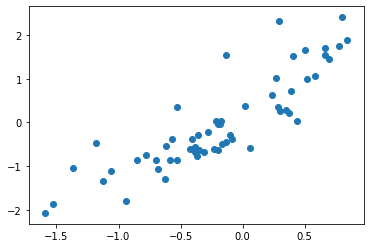

In [5]:
col = "FossilFuels"
scaler_data = StandardScaler()
scale_data = scaler_data.fit_transform(energy_data[col].values.reshape(-1,1))
x = StandardScaler().fit_transform(energy_data.drop(columns = ["Year", col, "Petroleum Coke", "All fuels (utility-scale)", "coal", 
                                    "petroleum liquids", "Petroleum Coke","Nature Gas", "Other Gases", 
                                    "wood and wood-derived fuels", "other biomass", "Other", "all solar", 
                                    "small-scale solar photovoltaic"]))
#y = energy_data[]
print(len(scale_data), len(x))
x_train, x_test, y_train, y_test = train_test_split(x, scale_data, random_state = 1)
model = SVR(kernel = 'rbf', C = 1, gamma = .01)#, degree = 4, coef0 = 1)
model.fit(x_train, y_train)
time = arr[:171]
prediction=model.predict(x_test)
#plt.scatter(time, y_train, color='blue')
#data_range = np.linspace(min(x_test), max(x_test)).reshape(-1,1)
#prediction = model.predict(data_range)
#plt.plot(data_range, prediction , color="black", linewidth = 1)
#plt.ylabel(data_sel+" Energy (Trillion BTU)")
#plt.xlabel("Year")
#plt.show()
plt.scatter(prediction, y_test)


In [7]:
x = np.array(arr).reshape(-1,1)
y = energy_data['FossilFuels'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = SVR(kernel = 'poly', C = 1, gamma = .01, degree = 4, coef0 = 1)
model.fit(x_train, y_train)
prediction=model.predict(x_test)
plt.scatter(x_train, y_train, color='blue')
data_range = np.linspace(min(x_test), max(x_test)).reshape(-1,1)
prediction = model.predict(data_range)
plt.plot(data_range, prediction , color="black", linewidth = 1)
plt.ylabel("Fossil Fuels Energy (Trillion BTU)")
plt.xlabel("Year")
plt.show()
print(model.score(x,y))

NameError: name 'arr' is not defined